<a href="https://colab.research.google.com/github/data2450/imageclassification_fastai/blob/main/boat_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# used image augmentation to increase the accuracy of the model

In [ ]:
from fastai.vision import *

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
"""""from keras.preprocessing.image import ImageDataGenerator
image_data = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      #rotation_range = 15,
                                      #horizontal_flip = True,
                                      validation_split = 0.2
                                         )

In [ ]:
""""full=image_data.flow_from_directory("/content/drive/MyDrive/kaggle_data/boats",
                                                       target_size = (229, 229),
                                                       color_mode="rgb",
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       shuffle=True,
                                                       )

Found 2580 images belonging to 9 classes.


In [ ]:
##h=full.labels

In [ ]:
(unique, counts) = np.unique(h, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder( Path("/content/drive/MyDrive/datasets_for_colab/boat/boats"),train='.',test='/content/drive/MyDrive/datasets_for_colab/boat/TEST'
               , valid_pct=0.2, bs=64, size=299, ds_tfms=get_transforms()).normalize(imagenet_stats)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['buoy',
  'cruise ship',
  'ferry boat',
  'freight boat',
  'gondola',
  'inflatable boat',
  'kayak',
  'paper boat',
  'sailboat'],
 9,
 2064,
 516)

In [ ]:
vc = pd.value_counts(data.y.items, sort=False)
vc.index = data.classes; 

In [ ]:
vc

buoy               215
cruise ship        266
ferry boat         191
freight boat       197
gondola            394
inflatable boat    186
kayak              225
paper boat         190
sailboat           200
dtype: int64

In [ ]:
vc_new = pd.value_counts(data.y.items, sort=False)
vc_new.index = data.classes; 

In [ ]:
vc_new

In [ ]:
#since the dataset is unbalanced we can do some image augmenation and make it balance 
#according to each class we can generate additional augmentaed images

 #data augmentation with fastai saving it to the files

#already done the image augmentation
"""
path = Path('/content/drive/MyDrive/kaggle_data/boats')
path_hr = '/content/drive/MyDrive/kaggle_data/boats/ferry boat'
il = ImageList.from_folder(path_hr)
tfms = get_transforms(max_rotate=25)
def data_aug_one(ex_img,prox,qnt):
   for lop in range(0,qnt):
      image_name = Path(str(prox).zfill(8) +'.jpg')
      #print(image_name)
      #dest = path_hr/image_name
      dest = path.joinpath(path_hr,image_name)
      prox = prox + 1
      new_img = open_image(ex_img)
      new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 229}}, size=229)
      new_img_fin.save(dest)
prox = 20
qnt = 3 #change this number according to number of augmented images we need
for imagen in il.items:
   data_aug_one(imagen,prox,qnt)
   prox = prox + qnt

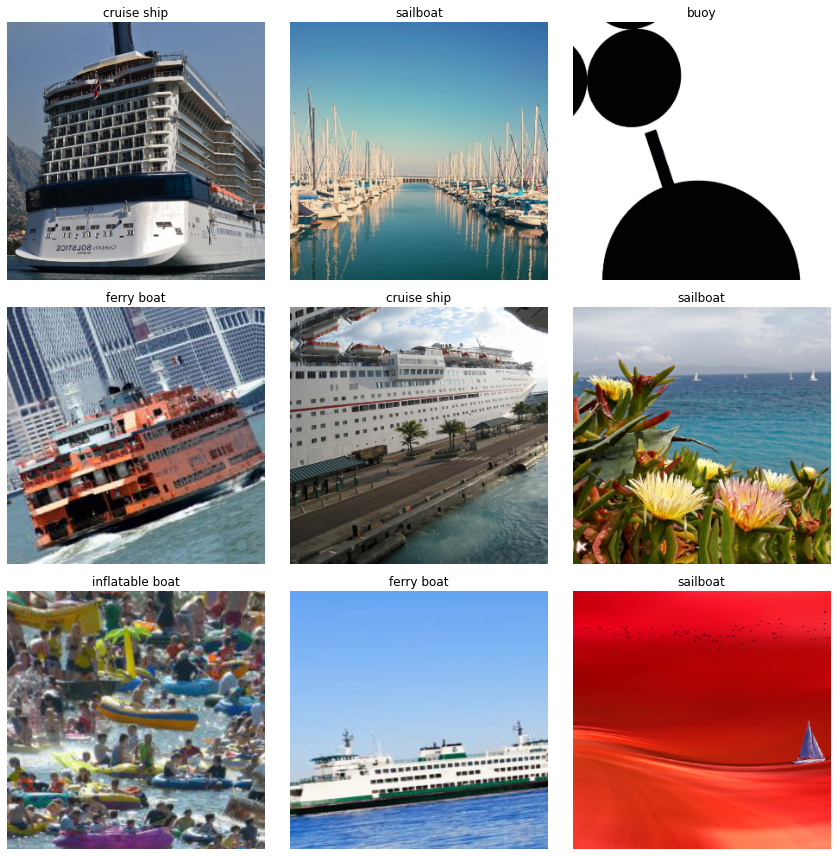

In [ ]:
data.show_batch(rows=3)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
#from efficientnet_pytorch import EfficientNet

In [ ]:
#model=EfficientNet.from pretrained('efficientnet-b3')

In [ ]:
#model

In [ ]:
#model._fc = nn.Linear(1536,2)

In [ ]:
#learn=Learner(data,model,
                 #bn_vd=False,
                 #metric=error_rate,
                 #loss_fun=LabelSmoothingCrossEntropy()
                 #).to_fp16()
                 

#learn.fit_one_cycle(8)                   

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


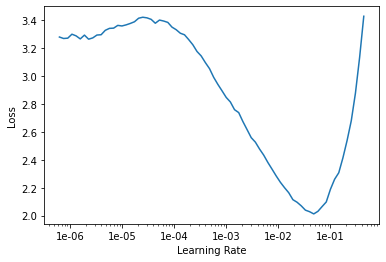

In [ ]:
learn.recorder.plot()

In [ ]:
lr=1e-03

In [ ]:
learn.fit_one_cycle(8,lr)

epoch,train_loss,valid_loss,error_rate,time
0,2.119040,0.505712,0.168605,07:46
1,1.090699,0.179346,0.075581,01:32
2,0.649044,0.188888,0.065891,01:29
3,0.411446,0.109601,0.034884,01:30
4,0.266273,0.093851,0.034884,01:30
5,0.189364,0.084947,0.025194,01:30
6,0.139190,0.072975,0.025194,01:30
7,0.109465,0.069733,0.023256,01:30


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


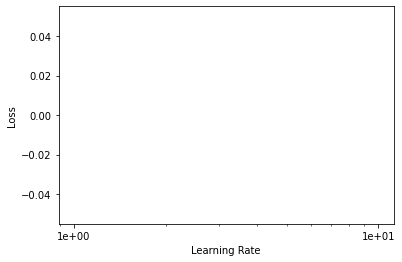

In [ ]:
learn.recorder.plot()

In [ ]:
lr=1e-03

In [ ]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.154519,0.217696,0.075581,01:37
1,0.294957,0.394692,0.106589,01:37
2,0.251912,0.137281,0.042636,01:38
3,0.139215,0.058398,0.019380,01:38
4,0.081382,0.052061,0.015504,01:39


In [ ]:
learn.save('stage-2')

In [ ]:
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
#np.random.seed(42)
#data = ImageDataBunch.from_folder( Path("/content/drive/MyDrive/datasets_for_colab/boat"),train='/TRAIN',test='/content/drive/MyDrive/datasets_for_colab/boat/TEST'
               #, valid_pct=0.2, bs=32, size=299, ds_tfms=get_transforms(),num_workers=4).normalize(imagenet_stats)

In [ ]:
learn.data=data
data.train_ds[0][0].shape

torch.Size([3, 299, 299])

In [ ]:
#learn.freeze()

In [ ]:
#learn.lr_find()
#learn.recorder.plot()

In [ ]:
#lr=1e-03

In [ ]:
#learn.fit_one_cycle(8,slice(lr))

In [ ]:
#learn.unfreeze()

In [ ]:
#learn.fit_one_cycle(4,slice(1e-05,lr/5))

In [ ]:
#prediction
#preds, y = learn.get_preds( ds_type=DatasetType.Test)

In [ ]:
#pre=np.argmax(preds,1)

In [ ]:
#preds = []
#for i in pre:
    #preds.append(int(i))

In [ ]:
#preds

In [ ]:
#2nd prediction

pred_2, y = learn.get_preds( ds_type=DatasetType.Test)

In [ ]:
pre_2=np.argmax(pred_2,1)

In [ ]:
preds_2 = []
for i in pre_2:
    preds_2.append(int(i))

In [ ]:
preds_2

[1,
 0,
 6,
 8,
 1,
 3,
 4,
 6,
 2,
 5,
 6,
 4,
 0,
 5,
 4,
 4,
 8,
 1,
 1,
 6,
 4,
 2,
 1,
 1,
 4,
 4,
 4,
 3,
 4,
 0,
 8,
 3,
 4,
 1,
 4,
 1,
 0,
 2,
 5,
 8,
 4,
 5,
 1,
 0,
 1,
 8,
 4,
 1,
 1,
 8,
 1,
 7,
 8,
 6,
 4,
 8,
 6,
 6,
 6,
 4,
 1,
 6,
 1,
 8,
 6,
 6,
 6,
 1,
 7,
 4,
 6,
 2,
 1,
 4,
 6,
 6,
 8,
 6,
 4,
 4,
 2,
 8,
 6,
 3,
 6,
 6,
 0,
 6,
 1,
 0,
 4,
 4,
 6,
 1,
 7,
 8,
 6,
 6,
 1,
 8,
 6,
 2,
 4,
 4,
 8,
 8,
 2,
 3,
 6,
 4,
 6,
 6,
 1,
 6,
 6,
 7,
 4,
 7,
 1,
 4,
 6,
 4,
 0,
 1,
 1,
 6,
 8,
 6,
 8,
 2,
 6,
 2,
 8,
 1,
 0,
 1,
 1,
 1,
 4,
 0,
 6,
 1,
 8,
 1,
 6,
 1,
 0,
 6,
 2,
 1,
 4,
 1,
 1,
 2,
 3,
 4,
 8,
 1,
 1,
 2,
 4,
 1,
 4,
 8,
 8,
 4,
 7,
 1,
 4,
 1,
 6,
 4,
 4,
 4,
 1,
 6,
 6,
 4,
 8,
 2,
 4,
 8,
 5,
 6,
 7,
 8,
 8,
 1,
 4,
 6,
 2,
 8,
 4,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 4,
 6,
 6,
 8,
 4,
 8,
 6,
 7,
 0,
 1,
 8,
 4,
 6,
 1,
 4,
 7,
 1,
 8,
 8,
 6,
 4,
 6,
 6,
 0,
 4,
 6,
 4,
 4,
 2,
 8,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [ ]:
folder_path = '/content/drive/MyDrive/datasets_for_colab/boat/TEST'

# dimensions of images
#img_width, img_height = 224, 224

# load all images into a list
images = []
imagenames = os.listdir(folder_path)

In [ ]:
imagenames

['256.jpg',
 '254.jpg',
 '46.jpg',
 '14.jpg',
 '107.jpg',
 '265.jpg',
 '32.jpg',
 '150.jpg',
 '30.jpg',
 '260.jpg',
 '259.jpg',
 '60.jpg',
 '296.jpg',
 '16.jpg',
 '168.jpg',
 '227.jpg',
 '167.jpg',
 '99.jpg',
 '91.jpg',
 '209.jpg',
 '40.jpg',
 '88.jpg',
 '64.jpg',
 '124.jpg',
 '155.jpg',
 '219.jpg',
 '81.jpg',
 '274.jpg',
 '286.jpg',
 '137.jpg',
 '207.jpg',
 '234.jpg',
 '172.jpg',
 '56.jpg',
 '153.jpg',
 '222.jpg',
 '279.jpg',
 '294.jpg',
 '263.jpg',
 '84.jpg',
 '18.jpg',
 '63.jpg',
 '42.jpg',
 '17.jpg',
 '43.jpg',
 '211.jpg',
 '20.jpg',
 '93.jpg',
 '55.jpg',
 '236.jpg',
 '220.jpg',
 '36.jpg',
 '247.jpg',
 '257.jpg',
 '231.jpg',
 '98.jpg',
 '105.jpg',
 '11.jpg',
 '181.jpg',
 '39.jpg',
 '164.jpg',
 '125.jpg',
 '111.jpg',
 '86.jpg',
 '223.jpg',
 '163.jpg',
 '246.jpg',
 '178.jpg',
 '34.jpg',
 '92.jpg',
 '193.jpg',
 '162.jpg',
 '199.jpg',
 '123.jpg',
 '179.jpg',
 '268.jpg',
 '45.jpg',
 '201.jpg',
 '288.jpg',
 '261.jpg',
 '177.jpg',
 '154.jpg',
 '80.jpg',
 '69.jpg',
 '157.jpg',
 '72.jpg',
 

In [ ]:
#final_data1 = {'filename':imagenames, 'label':preds }
#submission_od = pd.DataFrame(data=final_data1)

In [ ]:
#submission_od.head()

In [ ]:
#submission_od.head()

In [ ]:
#submission_od.head()

['buoy',
  'cruise_ship',
  'ferry_boat',
  'freight_boat',
  'gondola',
  'inflatable_boat',
  'kayak',
  'paper_boat',
  'sailboat

In [ ]:
#submission_od["label"].replace([0,1,2,3,4,5,6,7,8],['buoy','cruise_ship','ferry_boat','freight_boat','gondola','inflatable_boat','kayak','paper_boat','sailboat'],inplace = True)

In [ ]:
#submission_od.head()

,filename,label
0,256.jpg,cruise_ship
1,254.jpg,buoy
2,46.jpg,kayak
3,14.jpg,sailboat
4,107.jpg,cruise_ship


In [ ]:
#%cd "/content"
#submission_od.to_csv('bb_tt.csv', index =False)

/content


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

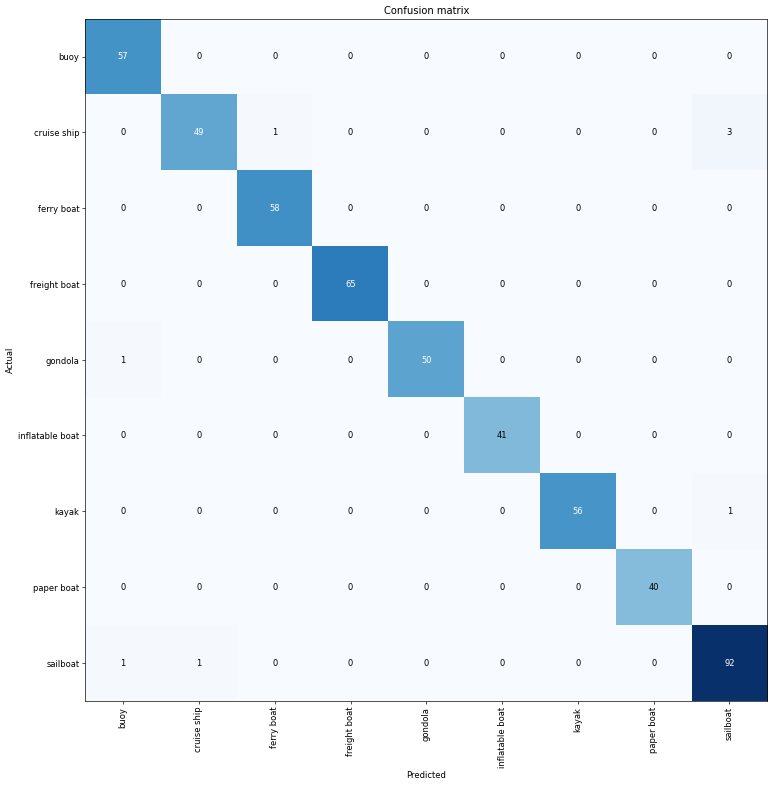

In [ ]:
interp.plot_confusion_matrix(figsize=(13,13),dpi=60)

In [ ]:
final_data1 = {'filename':imagenames, 'label':preds_2 }
submission_od_2 = pd.DataFrame(data=final_data1)

In [ ]:
submission_od_2.head()

In [ ]:
submission_od_2["label"].replace([0,1,2,3,4,5,6,7,8],['buoy','cruise_ship','ferry_boat','freight_boat','gondola','inflatable_boat','kayak','paper_boat','sailboat'],inplace = True)

In [ ]:
submission_od_2.head()

,filename,label
0,256.jpg,cruise_ship
1,254.jpg,buoy
2,46.jpg,kayak
3,14.jpg,sailboat
4,107.jpg,cruise_ship


In [ ]:
%cd "/content"
submission_od_2.to_csv('ff.csv', index =False)

/content
